# 分别统计不同病变区域的数量

In [1]:
from PIL import Image, ImageDraw
import cv2
import numpy as np
import os,sys
import scipy.io
import csv
%matplotlib inline
ROOT_DIR = os.getcwd()

In [2]:
DR_IMAGE_DIR = os.path.join(ROOT_DIR, "ImageSynthesis/4lesions/HE") #DRDataset/SubChallenge_1_Images
    # Load a random image from the images folder
file_names = next(os.walk(DR_IMAGE_DIR))[2]

In [3]:
def extractROI(img_new, filename, typelesion):
    image = Image.fromarray(img_new)
    img_gray=np.array(image.convert("L")) 
    mask_arr = np.array(img_gray != 0).astype(np.uint8)

    mask_arr = mask_arr*255
    [x,y]=img_gray.shape
    Mask_arr= np.zeros([x,y,3], dtype = np.uint8)

    ROI,contours,hierarchy= cv2.findContours(mask_arr,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

    #box = []
    centerlist = [] 
    mylist2 = []
    #for item in data: 
    
    lesionNum = len(contours)
    area = cv2.countNonZero(mask_arr)

    for i in range(len(contours)):
        x,y,w,h=cv2.boundingRect(contours[i]) #（x,y）为矩形左上角的坐标，（w,h）是矩形的宽和高
        centerX = round(x + w/2)
        centerY = round(y + h/2)
        centerlist.append([centerX, centerY])
    
    centerLocation = np.array(centerlist)
    scipy.io.savemat('ImageSynthesis/4lesions/'+typelesion+'/'+filename+'.mat',
                 {'centerLocation':centerLocation})  # 写入mat文件 
    return lesionNum,area

def extractROI2(img_new):
    image = Image.fromarray(img_new)
    img_gray=np.array(image.convert("L")) 
    mask_arr = np.array(img_gray != 0).astype(np.uint8)

    mask_arr = mask_arr*255
    [x,y]=img_gray.shape
    Mask_arr= np.zeros([x,y,3], dtype = np.uint8)

    ROI,contours,hierarchy= cv2.findContours(mask_arr,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    lesionNum = len(contours)
    area = 0
    #for i in range(len(contours)):
    area = cv2.countNonZero(mask_arr)

    return lesionNum,area

In [4]:
#Pointdata = [['Image No', 'MA', 'HR', 'HE', 'SE', 'areaMA', 'areaHR', 'areaHE', 'areaSE']]
Pointdata = [['Image No', 'MA', 'HR', 'HE', 'areaMA', 'areaHR', 'areaHE']]

for i in range(len(file_names)):  #len(file_names)
    newfile_name = file_names[i].strip('.png')
    print(i+1, newfile_name)
    #print(file_names[i])
    src1 = cv2.imread("ImageSynthesis/4lesions/HE/"+file_names[i])
    HELesionNum,areaHE = extractROI(src1, newfile_name, 'HELocationISBI')
    #HELesionNum,areaHE = extractROI2(src1)
    
#     src2 = cv2.imread("ImageSynthesis/4lesions/SE/"+file_names[i])
#     SELesionNum,areaSE = extractROI2(src2)
    
    src3 = cv2.imread("ImageSynthesis/4lesions/MA/"+file_names[i])
    #print(src3)
    MALesionNum,areaMA = extractROI2(src3)
    
    src4 = cv2.imread("ImageSynthesis/4lesions/HR/"+file_names[i])
    HRLesionNum,areaHR = extractROI2(src4)
    
    Pointdata.append([file_names[i], MALesionNum, HRLesionNum, HELesionNum, areaMA, areaHR, areaHE])
    
#     Pointdata.append([file_names[i], MALesionNum, HRLesionNum, HELesionNum, SELesionNum,
#                      areaMA, areaHR, areaHE, areaSE])
   
csvFile2 = open('ImageSynthesis/4lesions/LesionNumNewISBI.csv','w', newline='') # 设置newline，否则两行之间会空一行
writer = csv.writer(csvFile2)
m = len(Pointdata)
for i in range(m):
    writer.writerow(Pointdata[i])
csvFile2.close()

#     src = src1 + src2 + src3 + src4
#     im_gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
#     retval, im_at_fixed = cv2.threshold(im_gray, 50, 255, cv2.THRESH_BINARY) 
#     #im_at_mean = cv2.adaptiveThreshold(im_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)
#     cv2.imwrite('ImageSynthesis/4lesions/syn/'+file_names[i],im_at_fixed)

1 IDRiD_093
2 IDRiD_087
3 IDRiD_078
4 IDRiD_050
5 IDRiD_044
6 IDRiD_045
7 IDRiD_051
8 IDRiD_079
9 IDRiD_086
10 IDRiD_092
11 IDRiD_084
12 IDRiD_090
13 IDRiD_047
14 IDRiD_053
15 IDRiD_052
16 IDRiD_046
17 IDRiD_091
18 IDRiD_085
19 IDRiD_081
20 IDRiD_095
21 IDRiD_042
22 IDRiD_056
23 IDRiD_057
24 IDRiD_043
25 IDRiD_094
26 IDRiD_080
27 IDRiD_096
28 IDRiD_082
29 IDRiD_055
30 IDRiD_041
31 IDRiD_069
32 IDRiD_068
33 IDRiD_040
34 IDRiD_054
35 IDRiD_083
36 IDRiD_097
37 IDRiD_033
38 IDRiD_027
39 IDRiD_026
40 IDRiD_032
41 IDRiD_018
42 IDRiD_024
43 IDRiD_030
44 IDRiD_031
45 IDRiD_025
46 IDRiD_019
47 IDRiD_021
48 IDRiD_035
49 IDRiD_009
50 IDRiD_008
51 IDRiD_034
52 IDRiD_020
53 IDRiD_036
54 IDRiD_022
55 IDRiD_023
56 IDRiD_037
57 IDRiD_012
58 IDRiD_006
59 IDRiD_007
60 IDRiD_013
61 IDRiD_039
62 IDRiD_005
63 IDRiD_011
64 IDRiD_010
65 IDRiD_004
66 IDRiD_038
67 IDRiD_014
68 IDRiD_028
69 IDRiD_029
70 IDRiD_015
71 IDRiD_001
72 IDRiD_017
73 IDRiD_003
74 IDRiD_002
75 IDRiD_016
76 IDRiD_059
77 IDRiD_071
78 IDRiD

40

27

39

30

36

32

30

37

32

36

27

34

36

29

41

32

35

44

32

31

32

34

30

41

34

27

33

34

37

30

30

29

33

37

35

32

30

35

39

43

39

42

35

31

38

40

41

44

41

39

38

41

41

39

42

38

31

36

41

35

41

30

35

37

39

38

35

38

39

32

37

38

35

37

35

41

38

29

30

32

31

29

29

41

36

36

38

29

29

42

35

29

29

40

42

38

37

35

36

41

39

37

37

36

# 计算DME

In [5]:
import numpy as np
import os,sys
import scipy.io
import xlrd
import csv
import xlwt
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_DIR = os.getcwd()

In [6]:
DR_IMAGE_DIR = os.path.join(ROOT_DIR, "ImageSynthesis/4lesions/HE") #DRDataset/SubChallenge_1_Images
    # Load a random image from the images folder
file_names = next(os.walk(DR_IMAGE_DIR))[2]

In [10]:
widthdata = xlrd.open_workbook('ImageSynthesis/4lesions/ODCenterISBI.xlsx')
widthtable = widthdata.sheets()[0]          #通过索引顺序获取
widthnrows = widthtable.nrows
#print(widthnrows)
widthNameImage = widthtable.col_values(0)

def findODWidth(filename):
    p=widthNameImage.index(filename)
    width = widthtable.cell(p,3).value
    #print(width)
    return width

In [11]:
foveacenterdata = xlrd.open_workbook('ImageSynthesis/4lesions/FoveaCenterNEWISBI.xlsx')
centertable = foveacenterdata.sheets()[0]          #通过索引顺序获取
centernrows = centertable.nrows
#print(centernrows)
centerNameImage = centertable.col_values(0)
#print(type(centerNameImage))
def findFoverCenter(filename):
    p=centerNameImage.index(filename)
    x = centertable.cell(p,1).value
    y = centertable.cell(p,2).value
    center = [x, y]
    #print(center)
    return center

In [12]:
Pointdata = [['Image No', 'Risk of macular edema']]
for i in range(len(file_names)):  #len(file_names)
    newfile_name = file_names[i].strip('.png')
    #print(i+1, newfile_name)
    data = scipy.io.loadmat('ImageSynthesis/4lesions/HELocationISBI/'+newfile_name+'.mat') 
    centerLocation = data['centerLocation']
    foveacenter = findFoverCenter(newfile_name)
    width = findODWidth(newfile_name)
    distance = []
    if len(centerLocation) <= 10:
        dmeGrading = 0
    else:
        for j in range(len(centerLocation)):    #len(centerLocation)
    #         print(centerLocation[j][0])
    #         print(centerLocation[j][1])
    #         print(foveacenter[0])
    #         print(foveacenter[1])        
            temp = ((centerLocation[j][0] - foveacenter[0])**2 + (centerLocation[j][1] - foveacenter[1])**2)** 0.5
            distance.append(round(temp))
        minds = min(distance)
        if minds <= width:
            dmeGrading = 2
        else:
            dmeGrading = 1
    
    Pointdata.append([newfile_name, dmeGrading])
   
csvFile2 = open('ImageSynthesis/4lesions/SDNU_Disese_Grading_DME.csv','w', newline='') # 设置newline，否则两行之间会空一行
writer = csv.writer(csvFile2)
m = len(Pointdata)
for i in range(m):
    writer.writerow(Pointdata[i])
csvFile2.close()

32

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

13

# 统计DME准确率

0.673123486683
(array([2]),)


Text(0.5,0,'HE No.')

Text(0,0.5,'ACC')

Text(0.5,1,'Line plot')

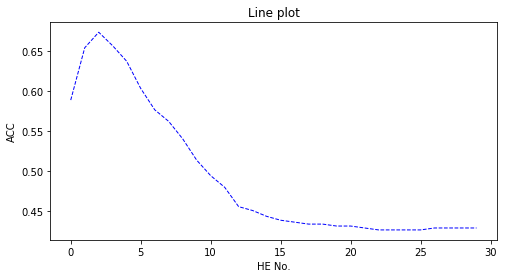

In [9]:
# 用来计算DME Grading的accuracy
#Dmegrading = []
accuracy = []
x = []
data = xlrd.open_workbook('ImageSynthesis/4lesions/IDRiD_Training_Set.xlsx')
table = data.sheets()[0]          #通过索引顺序获取
nrows = table.nrows
gtDMEgrading = table.col_values(2)
GTDMEGrading = gtDMEgrading[1:]
for k in range(30):
    Dmegrading = []
    x.append(k)
    for i in range(len(file_names)):  #len(file_names)
        #newfile_name = file_names[i].strip('.png')
        newfile_name = 'IDRiD_%03d' % (i+1)
        #print(i+1, newfile_name)
        data = scipy.io.loadmat('ImageSynthesis/4lesions/HELocation1030xiaoping/'+newfile_name+'.mat') 
        centerLocation = data['centerLocation']
        foveacenter = findFoverCenter(newfile_name)
        width = findODWidth(newfile_name)
        distance = []

        if len(centerLocation) <= k:
            dmeGrading = 0
        else:
            for j in range(len(centerLocation)):    #len(centerLocation)      
                temp = ((centerLocation[j][0] - foveacenter[0])**2 + (centerLocation[j][1] - foveacenter[1])**2)** 0.5
                distance.append(round(temp))
            minds = min(distance)
            if minds <= width:
                dmeGrading = 2
            else:
                dmeGrading = 1
        Dmegrading.append(dmeGrading)

    temp = np.array(Dmegrading) - np.array(GTDMEGrading)
    acc = np.sum(temp == 0)/413
    accuracy.append(acc)
    #print(k,acc)

ACC = np.amax(accuracy)
Position = np.where(accuracy == ACC)
#print(x)
print(ACC)
print(Position)

plt.figure(figsize=(8,4)) #创建绘图对象  
plt.plot(x,accuracy,"b--",linewidth=1)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）  
plt.xlabel("HE No.") #X轴标签  
plt.ylabel("ACC")  #Y轴标签  
plt.title("Line plot") #图标题  
#plt.savefig("ImageSynthesis/4lesions/lineHE0870xiaoping.pdf") #保存图  
plt.show()  #显示图

In [118]:
history

import numpy as np
import os,sys
import scipy.io
DR_IMAGE_DIR = os.path.join(ROOT_DIR, "ImageSynthesis/4lesions/HE") #DRDataset/SubChallenge_1_Images
    # Load a random image from the images folder
file_names = next(os.walk(DR_IMAGE_DIR))[2]
import numpy as np
import os,sys
import scipy.io
%matplotlib inline
ROOT_DIR = os.getcwd()
DR_IMAGE_DIR = os.path.join(ROOT_DIR, "ImageSynthesis/4lesions/HE") #DRDataset/SubChallenge_1_Images
    # Load a random image from the images folder
file_names = next(os.walk(DR_IMAGE_DIR))[2]

for i in range(2):  #len(file_names)
    newfile_name = file_names[i].strip('.png')
    data = scipy.io.loadmat('ImageSynthesis/4lesions/HELocation/'+newfile_name+'.mat')

for i in range(2):  #len(file_names)
    newfile_name = file_names[i].strip('.png')
    data = scipy.io.loadmat('ImageSynthesis/4lesions/HELocation/'+newfile_name+'.mat')
    centerLocation = data['centerLocation']
    print(centerLocation)
import numpy as np
import os,sys
import scipy.io
import xl